In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

In [2]:
N, distributionsNumber = 1000, 10000
gamma = 0.95

In [38]:
class Sample:
    def __init__(self, generator, minThetaFunction, maxThetaFunction, theta, legend, title, yMin, yMax):
        self.data = np.array(generator(N))
        self.generator = generator
        self.minThetaFunction = minThetaFunction
        self.maxThetaFunction = maxThetaFunction
        self.theta = theta
        self.legend = legend
        self.title = title
        self.yMin = yMin
        self.yMax = yMax
        
    def plotInterval(self, gamma):
        figure = plt.figure(figsize=(20, 10))
        axis = figure.gca()
        minTheta = [self.minThetaFunction(self.data, gamma, n) for n in range(1, N + 1)]
        maxTheta = [self.maxThetaFunction(self.data, gamma, n) for n in range(1, N + 1)]
        axis.fill_between(range(1, N + 1), minTheta, maxTheta, label=self.legend)
        axis.set_ylim(self.yMin, self.yMax)
        axis.legend(loc="upper left", fontsize="26")
        axis.set_xlabel("n", fontsize="16")
        axis.set_ylabel(r"$\theta$", fontsize="20")
        axis.set_title(self.title, fontsize="16")

    def findProbability(self, ns):
        result = []
        for n in ns:
            counter = 0
            for i in range(distributionsNumber):
                data = self.generator(N)
                if self.minThetaFunction(data, gamma, n) < self.theta < self.maxThetaFunction(data, gamma, n):
                    counter += 1
            result.append("n = {}: {}".format(n, counter / distributionsNumber))
        print(result[0] + ", " + result[1])

Для выборки из $U(0,\theta)$ будем использовать разные статистики. Если использовать $\overline{X}$, то доверительный интервал $\theta$ уровня доверия $\gamma$ это $(\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}+1},\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}-1})$. Если использовать $X_{(n)}$, то $(X_{(n)},\frac{X_{(n)}}{\sqrt[n]{1-\gamma}})$. Если же использовать $X_{(1)}$, то $(X_{(1)}, \frac{X_{(1)}}{1-\sqrt[n]{\gamma}})$.

Для распределения $Pois(\theta)$, асимптотический доверительный интервал уровня $\gamma$ это $(\overline{X}-u_{\frac{\gamma+1}{2}}\sqrt{\frac{\overline X}{n}},\overline{X}+u_{\frac{\gamma + 1}{2}}\sqrt{\frac{\overline{X}}{n}})$, где $u_{\frac{\gamma+1}{2}}$ - квантиль стандартного нормального распределения уровня $\frac{\gamma+1}{2}$.

Для распределения $Cauchy(\theta,1)$, асимптотический доверительный интервал уровня $(\mu-\frac{\pi u_{\frac{\gamma+1}{2}}}{2\sqrt{n}},\mu+\frac{\pi u_{\frac{\gamma+1}{2}}}{2\sqrt{n}})$, где $u_{\frac{\gamma+1}{2}}$ - квантиль стандартного нормального распределения уровня $\frac{\gamma+1}{2}$, а $\mu$ - медиана.

Для распределения $Г(\theta, \lambda)$, асимптотический доверительный интервал уровня $(\frac{\lambda-u_{\frac{\gamma+1}{2}}\sqrt{\frac{\lambda}{n}}}{\overline{X}},\frac{\lambda+u_{\frac{\gamma+1}{2}}\sqrt{\frac{\lambda}{n}}}{\overline{X}})$, где $u_{\frac{\gamma+1}{2}}$ - квантиль стандартного нормального распределения уровня $\frac{\gamma+1}{2}$.

In [39]:
# Задаем все выборки

samples = []
u = st.norm.ppf((gamma + 1) / 2)

samples.append(
    Sample(
        (lambda n: np.random.uniform(0, 1, n)),
        (lambda data, gamma, n: 2 * np.mean(data[:n]) * np.sqrt(3 * n * (1 - gamma)) /
            (1 + np.sqrt(3 * n * (1 - gamma)))),
        (lambda data, gamma, n: 2 * np.mean(data[:n]) * np.sqrt(3 * n * (1 - gamma)) /
            (np.sqrt(3 * n * (1 - gamma)) - 1)),
        1,
        r"$(\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}+1},\frac{2\overline{X}\sqrt{3n(1-\gamma)}}{\sqrt{3n(1-\gamma)}-1})$",
        r"$R(0,\theta)$ using $\overline{X}$",
        0.5, 1.5
    )
)
samples.append(
    Sample(
        (lambda n: np.random.uniform(0, 1, n)),
        (lambda data, gamma, n: np.min(data[:n])),
        (lambda data, gamma, n: np.min(data[:n]) / (1 - gamma ** (1 / n))),
        1,
        r"$(X_{(n)},\frac{X_{(n)}}{(1-\gamma)^{\frac{1}{n}}}$",
        r"$R(0,\theta)$ using $X_{(n)}$",
        0, 90
    )
)
samples.append(
    Sample(
        (lambda n: np.random.uniform(0, 1, n)),
        (lambda data, gamma, n: np.max(data[:n])),
        (lambda data, gamma, n: np.max(data[:n]) / ((1 - gamma) ** (1 / n))),
        1,
        r"$(X_{(1)},\frac{X_{(1)}}{1-\gamma^{\frac{1}{n}}})$",
        r"$R(0,\theta)$ using $X_{(1)}$",
        0.9, 1.1
    )
)
samples.append(
    Sample(
        (lambda n: np.random.poisson(1, n)),
        (lambda data, gamma, n: np.mean(data[:n]) - u * np.sqrt(np.mean(data[:n]) / n)), 
        (lambda data, gamma, n: np.mean(data[:n]) + u * np.sqrt(np.mean(data[:n]) / n)),
        1,
        r"$(\overline{X}-u\sqrt{\frac{\overline{X}}{n}},\overline{X}+u\sqrt{\frac{\overline{X}}{n}})$",
        r"$Pois(\theta)$",
        0, 2
    )
)
samples.append(
    Sample(
        (lambda n: np.random.standard_cauchy(n) + 1),
        (lambda data, gamma, n: np.median(data[:n]) - np.pi * u / (2 * np.sqrt(n))), 
        (lambda data, gamma, n: np.median(data[:n]) + np.pi * u / (2 * np.sqrt(n))),
        1,
        r"$(\mu-\frac{\pi u}{2\sqrt{n}},\mu+\frac{\pi u}{2\sqrt{n}})$",
        r"$Cauchy(\theta,1)$",
        -1, 2
    )
)
gammaLambda = 1
samples.append(
    Sample(
        (lambda n: np.random.gamma(gammaLambda, 1 / 10, n)),
        (lambda data, gamma, n: (gammaLambda - u * np.sqrt(gammaLambda / n)) / np.mean(data[:n])),
        (lambda data, gamma, n: (gammaLambda + u * np.sqrt(gammaLambda / n)) / np.mean(data[:n])),
        10,
        r"$(\frac{\lambda-u\sqrt{\frac{\lambda}{n}}}{\overline{X}},\frac{\lambda-u\sqrt{\frac{\lambda}{n}}}{\overline{X}})$",
        r"$Г(\theta,\lambda)$",
        5, 15
    )
)

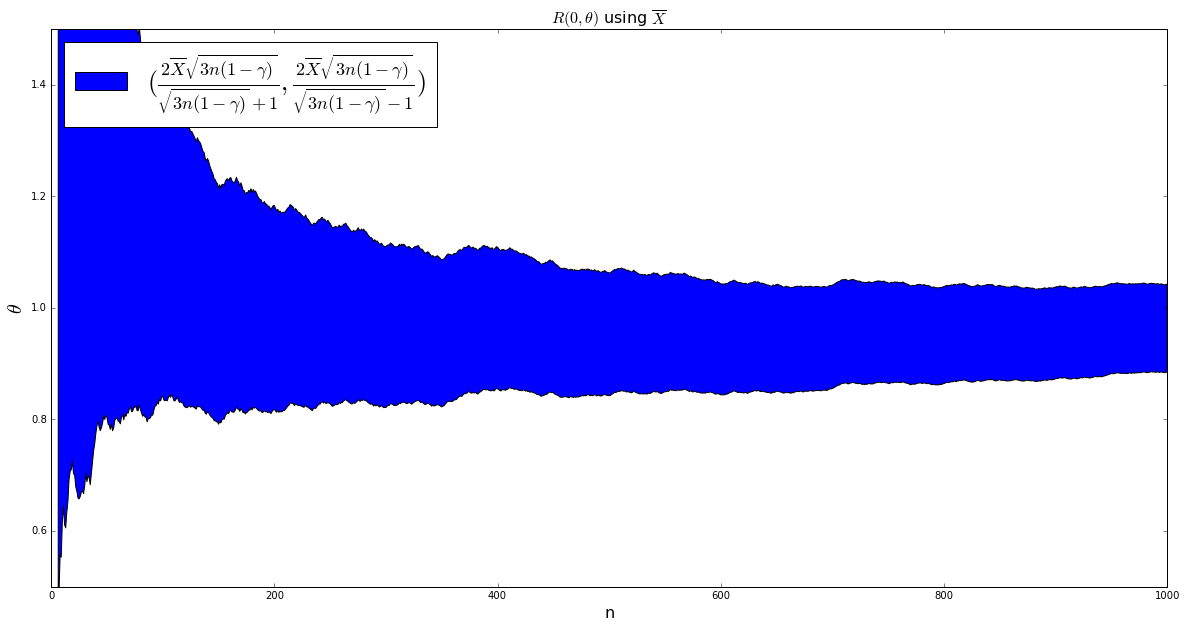

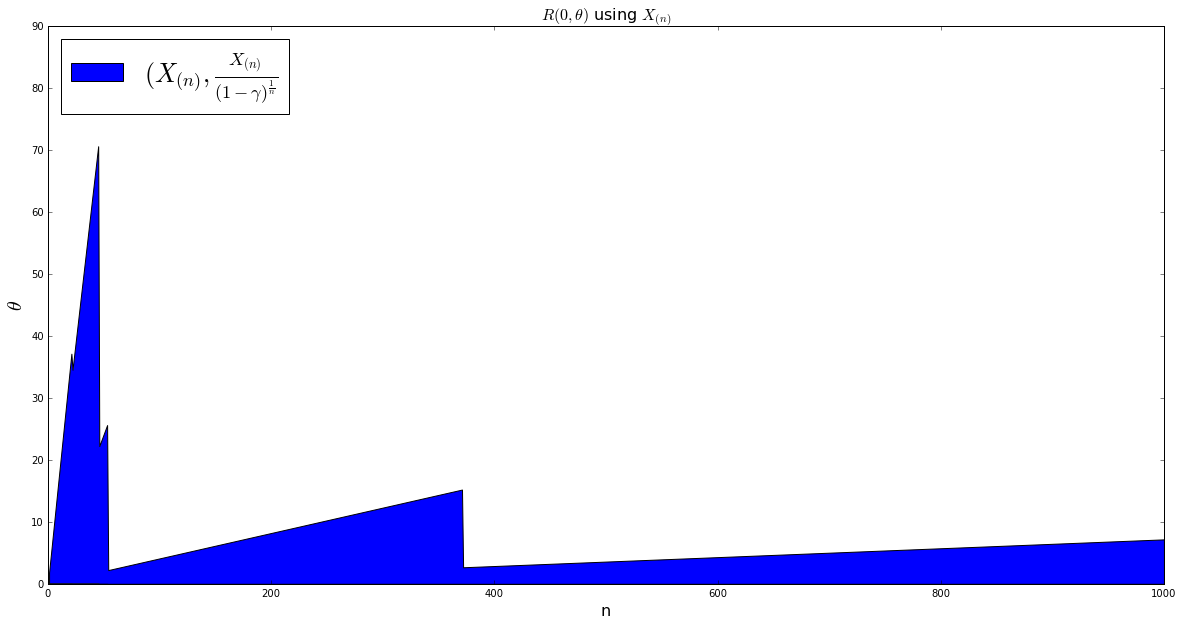

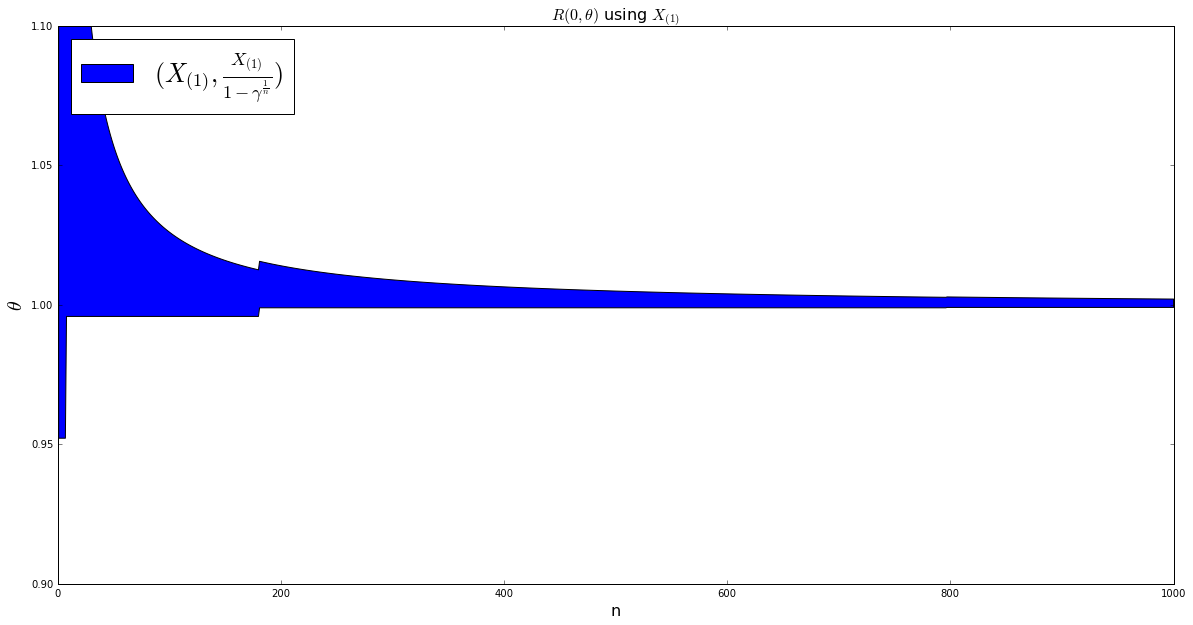

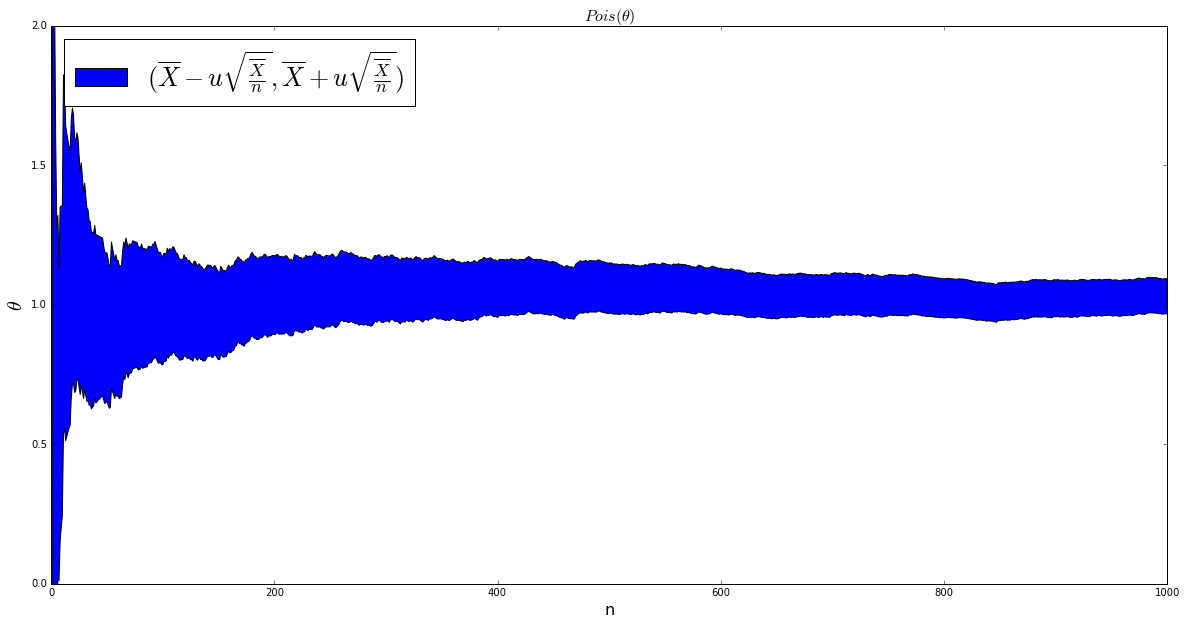

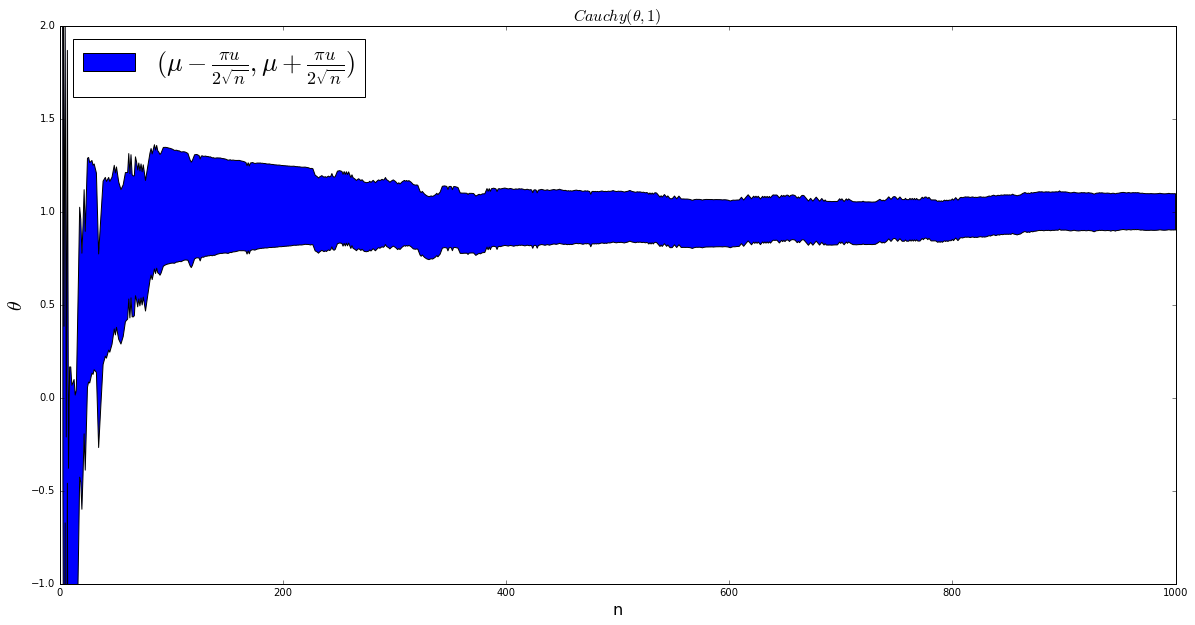

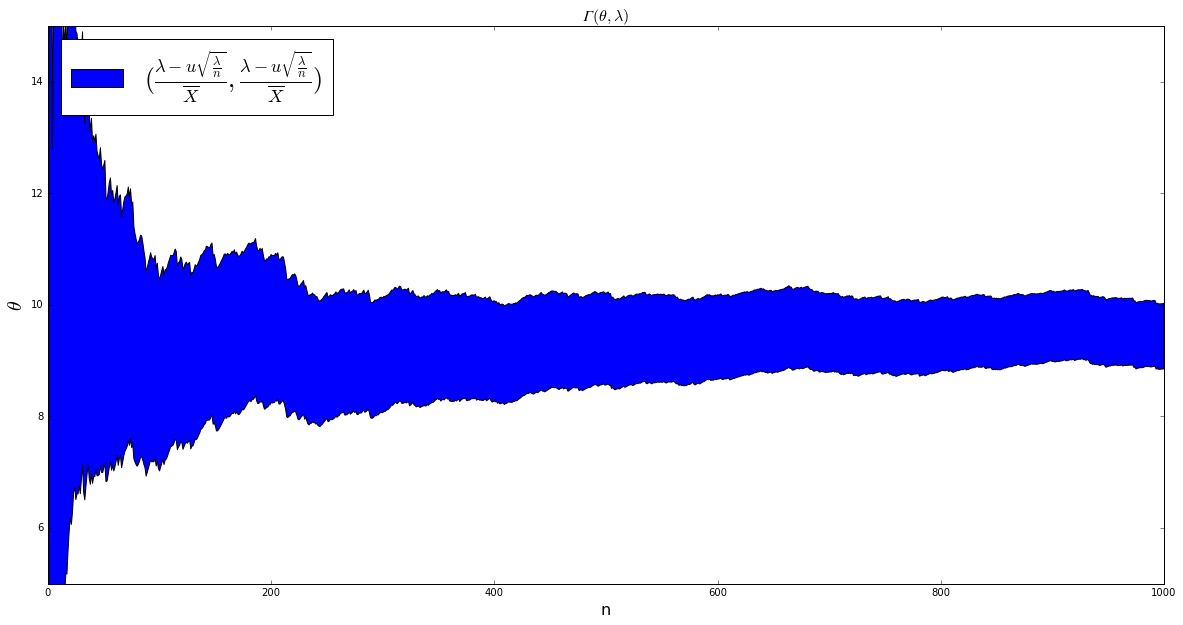

In [40]:
# Строим графики доверительных интервалов для всех выборок

for sample in samples:
    sample.plotInterval(gamma)

In [6]:
for sample in samples:
    sample.findProbability([10, 100])

n = 10: 1.0, n = 100: 1.0
n = 10: 0.9496, n = 100: 0.9505
n = 10: 0.9506, n = 100: 0.9512
n = 10: 0.9272, n = 100: 0.9455
n = 10: 0.9132, n = 100: 0.943
n = 10: 0.9541, n = 100: 0.9515


В результате видим, что первый доверительный интервал не достаточно точный, т.к. в него $\theta$ попадает с вероятностью $1$. Остальные соответствуют заданному $\gamma$. Так же хочется отметить, что доверительный интервал параметра равномерного рапределения, использующая статистику $X_{(1)}$ дает очень большой интервал для $\theta$. Вместо этого интервала лучше использовать другие.